In [2]:
import pandas as pd

# Load the dataset
file_path = "/content/MLTempDataset.csv"  # Path from the uploaded file
df = pd.read_csv(file_path)

# Display first few rows
df.head()


,Unnamed: 0,Datetime1,DAYTON_MW,Datetime
0,0,0,20.867,2022-01-04 00:00:00
1,1,1,21.000,2022-01-04 01:00:00
2,2,2,20.867,2022-01-04 02:00:00
3,3,3,20.650,2022-01-04 03:00:00
4,4,4,20.400,2022-01-04 04:00:00


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
<ipython-input-6-7bc32a9f5aa9>:21: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast.index = pd.date_range(start=ts.index[-1], periods=25, freq='H')[1:]


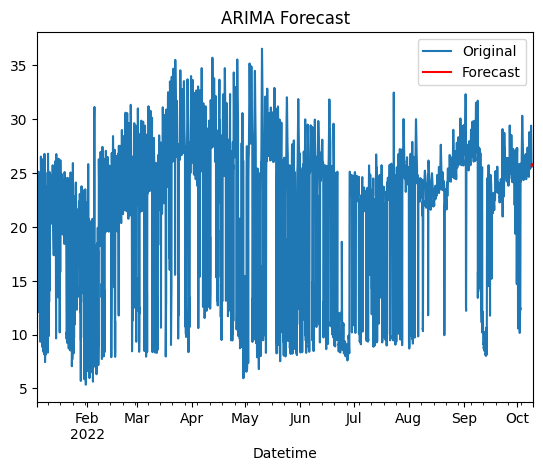

In [6]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load and prepare data
df = pd.read_csv("/content/MLTempDataset.csv")
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

ts = df['DAYTON_MW']

# Fit ARIMA
model = ARIMA(ts, order=(5, 1, 0))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=24)

# Plot
ts.plot(label='Original')
forecast.index = pd.date_range(start=ts.index[-1], periods=25, freq='H')[1:]
forecast.plot(label='Forecast', color='red')
plt.title("ARIMA Forecast")
plt.legend()
plt.show()
